In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import ( Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization ) 
from tensorflow.keras.utils import to_categorical
import joblib 
import numpy as np
import h5py


In [10]:
train = pd.read_csv("./ml-lab-datasets-main/datasets/train.csv") 
test = pd.read_csv("./ml-lab-datasets-main/datasets/test.csv") 
X_train = train.drop(['label'], axis=1).values 
y_train = train['label'].values 
X_test = test.values 
X_train = X_train.reshape(-1,28,28,1) 
X_test = X_test.reshape(-1,28,28,1) 
X_train = X_train /255 
X_test = X_test/255 
y_train = to_categorical(y_train) 

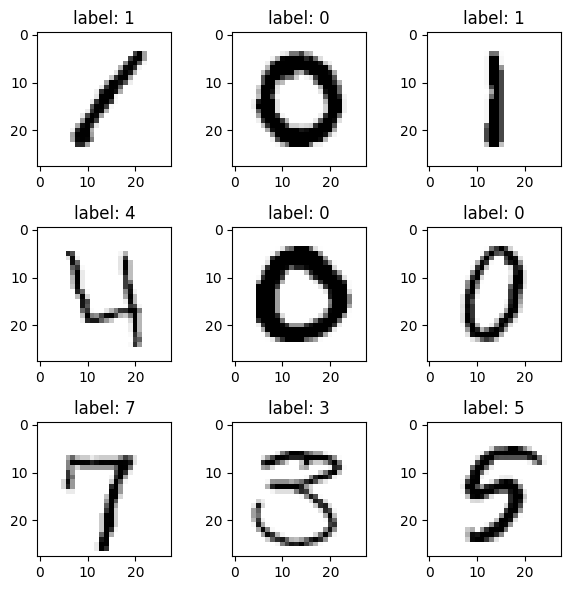

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(6, 6)) 
for i, ax in enumerate(axes.flat): 
   ax.imshow(X_train[i].squeeze(), cmap='binary') 
   digit = y_train[i].argmax() 
   ax.set(title = f"label: {digit}") 
fig.tight_layout() 

In [12]:
train = pd.read_csv("./ml-lab-datasets-main/datasets/train.csv") 
test = pd.read_csv("./ml-lab-datasets-main/datasets/test.csv") 
X_train = train.drop(['label'], axis=1).values 
y_train = train['label'].values 
X_test = test.values 
X_train = X_train.reshape(-1,28,28,1) 
X_test = X_test.reshape(-1,28,28,1) 
X_train = X_train /255 
X_test = X_test/255 
y_train = to_categorical(y_train) 

In [13]:
def get_model(): 
   model=Sequential() 
   model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1))) 
   model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu")) 
   model.add(MaxPooling2D(pool_size=(2,2))) 
   model.add(BatchNormalization()) 
   model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu")) 
   model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu")) 
     
   model.add(MaxPooling2D(pool_size=(2,2))) 
   model.add(BatchNormalization()) 
   model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu")) 
     
   model.add(MaxPooling2D(pool_size=(2,2))) 
     
   model.add(Flatten()) 
   model.add(BatchNormalization()) 
   model.add(Dense(512,activation="relu")) 
     
   model.add(Dense(10,activation="softmax")) 
   model.compile(loss="categorical_crossentropy", optimizer="adam", 
   metrics=["accuracy"]) 
   return model

tf.random.set_seed(0) 
model = get_model() 
print(model.summary())
    

c:\Users\mailr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 692,682 (2.64 MB)

 Trainable params: 691,786 (2.64 MB)

 Non-trainable params: 896 (3.50 KB)

None


In [14]:
history = model.fit( 
X_train, y_train, 
batch_size = 64, 
epochs = 20, 
validation_split=.2 
) 
# tf.keras.models.save_model(model,"models/mnist_cnn.h5") 
# joblib.dump(history.history, "models/mnist_cnn.history")

Epoch 1/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 47s 81ms/step - accuracy: 0.9326 - loss: 0.2108 - val_accuracy: 0.9795 - val_loss: 0.0665
Epoch 2/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.9854 - loss: 0.0472 - val_accuracy: 0.9821 - val_loss: 0.0668
Epoch 3/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9840 - val_loss: 0.0598
Epoch 4/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 42s 80ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9868 - val_loss: 0.0511
Epoch 5/20
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9938 - loss: 0.0214

In [ ]:
model = tf.keras.models.load_model("models/mnist_cnn.h5") 
history = joblib.load("models/mnist_cnn.history") 

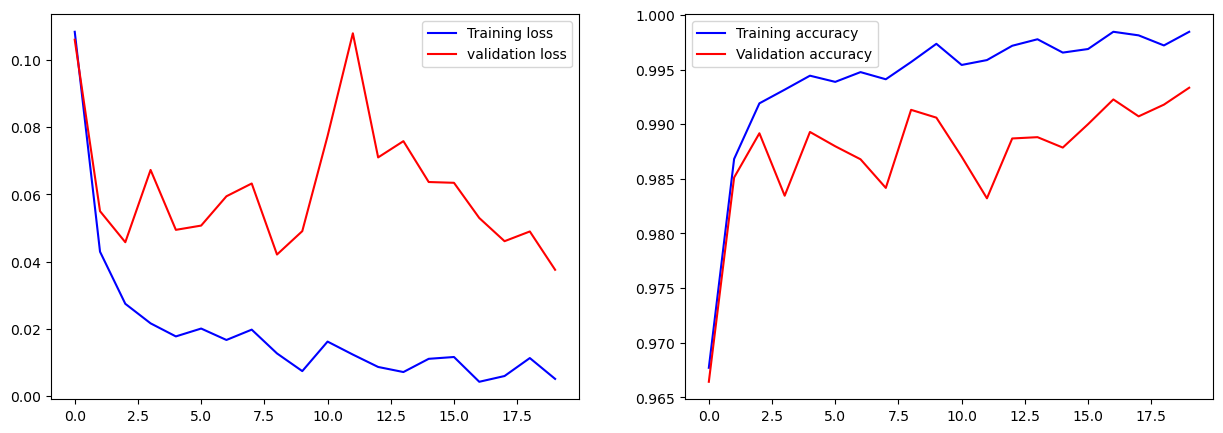

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5)) 
ax[0].plot(history['loss'], color='b', label="Training loss") 
ax[0].plot(history['val_loss'], color='r', label="validation loss") 
ax[0].legend()  
ax[1].plot(history['accuracy'], color='b', label="Training accuracy") 
ax[1].plot(history['val_accuracy'], color='r',label="Validation accuracy") 
ax[1].legend()

875/875 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


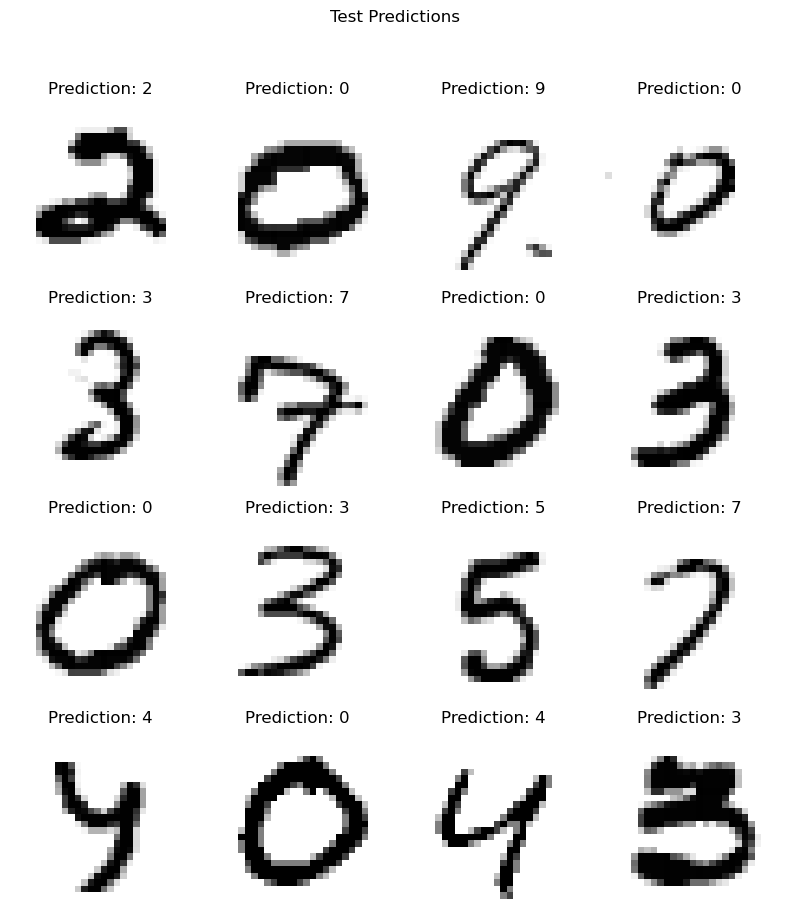

In [ ]:
y_pred = model.predict(X_test) 
fig, axis = plt.subplots(4, 4, figsize=(8,10)) 
for i, ax in enumerate(axis.flat): 
    ax.imshow(X_test[i].squeeze(), cmap='binary') 
    ax.set(title = f"Prediction: {y_pred[i].argmax()}"); 
    ax.axis("off") 
fig.suptitle("Test Predictions") 
fig.tight_layout(rect=[0, 0.05, 1, 0.95]) 
